# Preprocessing Data (and more EDA)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
from preprocessing import preprocessed_books_data, preprocessed_books_rating
from frequency import token_frequency

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/iagodantasf/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/iagodantasf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/iagodantasf/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [3]:
cfg = yaml.safe_load(open("config.yaml"))

## Books Rating

In [4]:
books_rating = preprocessed_books_rating(cfg)

In [5]:
books_rating.head()

,title,user_id,score,full_text
0,""" Film technique, "" and, "" Film acting """,A16MDRPUTCW4IF,5.0,Pudovkin. A must read for film lovers and stud...
1,""" Film technique, "" and, "" Film acting """,A3PPO4VVZKW9FI,4.0,Essential little text on editing. This volume ...
2,""" We'll Always Have Paris"": The Definitive Gui...",A2XFM8PN6G0B02,5.0,"Great book. The more than 11,000 quotes in thi..."
3,""" We'll Always Have Paris"": The Definitive Gui...",A4RXXT5KB9WVJ,5.0,I think this is the beginning of a beautiful f...
4,"""... And Poetry is Born ..."" Russian Classical...",A1PPF42PNXGFC3,4.0,Wonderful and unique selection of poetry. Rare...


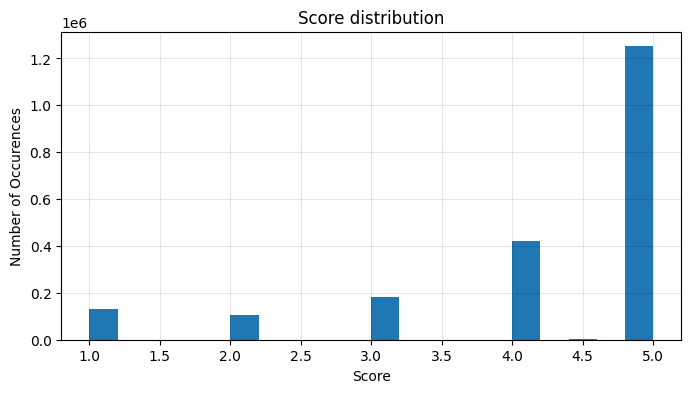

In [6]:
books_rating['score'].hist(bins=20, figsize=(8, 4))
plt.grid(c='k', alpha=0.1)
plt.title('Score distribution')
plt.xlabel('Score')
plt.ylabel('Number of Occurences')
plt.show()

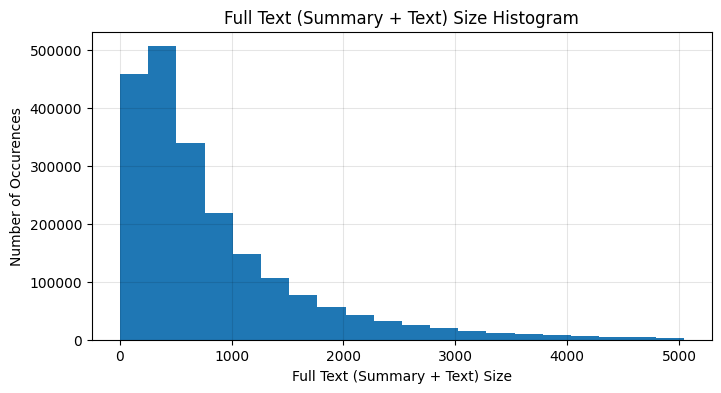

In [7]:
books_rating['full_text'].str.len().hist(bins=20, figsize=(8, 4))
plt.grid(c='k', alpha=0.1)
plt.title('Full Text (Summary + Text) Size Histogram')
plt.xlabel('Full Text (Summary + Text) Size')
plt.ylabel('Number of Occurences')
plt.show()

In [9]:
_full_text = books_rating['full_text'].loc[0]
print(_full_text)
print(token_frequency(_full_text))

Pudovkin. A must read for film lovers and students. Gives you an important outline of film basics and standards. This is a book within the bible of Film.
Counter({'film': 3, 'pudovkin': 1, 'must': 1, 'read': 1, 'lovers': 1, 'students': 1, 'gives': 1, 'important': 1, 'outline': 1, 'basics': 1, 'standards': 1, 'book': 1, 'within': 1, 'bible': 1})


In [10]:
n_texts = 1000

texts_token_frequency = (
    pd.Series(
        token_frequency(
            books_rating['full_text']
            .loc[:n_texts]
            .str.cat(sep=' ')
        ),
        name='token_frequency',
    )
    .sort_values()
)
texts_token_frequency.tail(20)

quot        326
books       330
good        337
series      343
grafton     345
like        371
great       410
&           484
(           522
)           538
;           540
one         559
n't         616
kinsey      639
``          641
''          709
!           747
read        747
's         1405
book       1734
Name: token_frequency, dtype: int64

Checking aggregations:

In [11]:
books_rating.query('title == "Out of the Dust" and user_id == "A2EEAHFEIX0MP6"')

,title,user_id,score,full_text
1096027,Out of the Dust,A2EEAHFEIX0MP6,3.5,"Out of the Dust. Out of the Dust. ""The rain ha..."


In [12]:
books_rating.query('title.str.startswith("Glacier pilot;: The story of Bob Reeve and the") and user_id == "A2L7N2U5Z316ZE"')

,title,user_id,score,full_text
590447,Glacier pilot;: The story of Bob Reeve and the...,A2L7N2U5Z316ZE,5.0,"Bush Pilot Supreme. Flying in a Wilderness. ""...."


## Books Data

In [13]:
books_data = preprocessed_books_data(cfg)

In [14]:
books_data

,title,description,authors,categories
0,Its Only Art If Its Well Hung!,,Julie Strain,Comics & Graphic Novels
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,Philip Nel,Biography & Autobiography
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,David R. Ray,Religion
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,Veronica Haddon,Fiction
4,"Nation Dance: Religion, Identity and Cultural ...",,Edward Long,NaN
...,...,...,...,...
212400,Red Boots for Christmas,Everyone in the village of Friedensdorf is hap...,NaN,Juvenile Fiction
212401,Mamaw,"Give your Mamaw a useful, beautiful and though...",Wild Wild Cabbage,NaN
212402,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,Zadie Smith,Fiction
212403,Student's Solutions Manual for Johnson/Mowry's...,Discover the many ways mathematics is relevant...,David B. Johnson,NaN
